## Twitter Archiver:  Retweets and Favorites versus Followers

Twitter encapsulates a vast amount of data from around the globe (and beyond it).

Thanks to <a href="http://www.labnol.org/about/">Amit Agarwal</a>, this data is now at our fingertips.

From his <a href="http://www.labnol.org/internet/save-twitter-hashtag-tweets/6505/">blog post</a>:


<blockquote cite="http://www.labnol.org/internet/save-twitter-hashtag-tweets/6505/">
Wouldn’t it be nice if Twitter had an Export button? You search for a trending #hashtag, or an old tweet, or your brand name, and all the matching tweets get saved in an Excel or Google spreadsheet. And this archive would just update itself in the background as new tweets arrive.
</blockquote>

Well, <a href="https://chrome.google.com/webstore/detail/twitter-archiver/pkanpfekacaojdncfgbjadedbggbbphi">Twitter Archiver</a> makes this possible.


This tutorial will serve as a basic introduction to the tool as well as a potential use for the data collected.


After installing Twitter Archiver, the first step is to make a new Google spreadsheet.


Once that's done, go to Add-ons -> Twitter Archiver -> Authorize Twitter


<img src="http://s22.postimg.org/l6xdy8ob5/Screen_Shot_2016_02_01_at_3_58_42_PM.png" width="512">


Authorize Twitter

<img src="http://s22.postimg.org/keupz1k41/Screen_Shot_2016_02_01_at_3_59_13_PM.png" width="512">


Next, you will be prompted to create a search rule.

<img src="http://s22.postimg.org/4unc8i9zl/Screen_Shot_2016_02_01_at_4_03_50_PM.png" width="512">


For the "Advanced Rules" section, check out <a href="http://www.labnol.org/internet/twitter-search-tricks/13693/">this blog post</a>.


As soon as you've decided on a phrase, hashtag, or user, click "Start Tracking" and begin populating your spreadsheet. You may see a box in the bottom right of your screen, but it should disappear after the initial twitter scraping is done. 


<img src="http://s22.postimg.org/6751ae7f5/Screen_Shot_2016_02_01_at_4_05_26_PM.png" width="256">


Then you will have a complete spreadsheet containing dates of tweets, user screen names, user full names, tweet content, as well as several other pieces of data pertaining to each individual tweet.


<img src="http://s22.postimg.org/jt5r2xp1t/Screen_Shot_2016_02_01_at_4_08_05_PM.png" width="768">


Luckily, the Google spreadsheet can then be exported for Excel or as a CSV.

"CSV" is short for "Comma Separated Values." It's like an Excel spreadsheet but instead of rows and columns, all the values are represented as text with commas separating them.

"Why would I want to do that?" you may ask yourself, but there are more interesting questions to be asked:


Where do these tweets come from?

What kinds of topics make tweets popular?

How do Twitter users describe themselves?

For this tutorial, we'll aim to answer the following question:

"What influence do followers have on retweets and favorites?"

It would be possible to go through the spreadsheet we generated and individually draw comparisons, but no single human should have the capacity to make any significant judgments from this data alone.

Thus, we will graph it.

Here, our aim will be to graph retweets and favorites of tweets versus the number of followers of the users who posted those tweets.

First, we'll perform some Jupyter magic to make our graph live inside the Jupyter window.

In [1]:
%matplotlib inline

Next, we import pandas for CSV reading, pyplot for graphing, patches for labeling, and numpy for some math.

Then, we set the plot style to something pretty.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.style.use('ggplot')

Read the tweets CSV

In [3]:
tweets_csv = pd.read_csv("Tweets.csv", header = 1, encoding = "latin1")

Convert it to a python dictionary

In [4]:
tweets_dict = tweets_csv.to_dict()

Make lists of number of followers, number of retweets, and number of favorites

In [5]:
followers = [value for key, value in tweets_dict["Followers"].items()]

In [6]:
retweets = [value for key, value in tweets_dict["Retweets"].items()]

In [7]:
favorites = [value for key, value in tweets_dict["Favorites"].items()]

Let's walk through the code step-by-step:

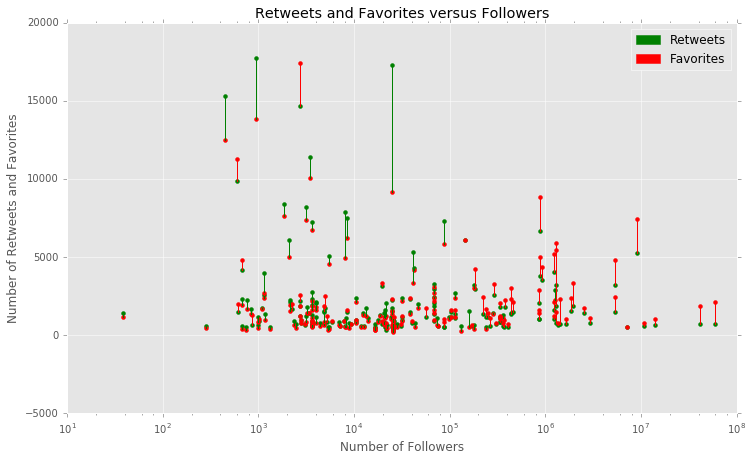

In [8]:
#First, we set the size of the graph.
plt.figure(figsize=(12, 7))
#Then we draw scatter plots of followers versus retweets and followers versus favorites.
plt.scatter(followers, retweets, color='g', s=15, marker='o')
plt.scatter(followers, favorites, color='r', s=15, marker='o')
#Then we draw lines connecting the retweet nodes and favorite nodes.
for retweet, favorite, follower in list(zip(retweets, favorites, followers)):
    if retweet > favorite:
        plt.plot([follower, follower], [retweet, favorite], "g")
    else:
        plt.plot([follower, follower], [retweet, favorite], "r")
#We label the axes and give the graph a title.
plt.xlabel('Number of Followers')
plt.ylabel('Number of Retweets and Favorites')
plt.title('Retweets and Favorites versus Followers')
#We create a legend.
retweets_patch = mpatches.Patch(color='green', label='Retweets')
favorites_patch = mpatches.Patch(color='red', label='Favorites')
plt.legend(handles=[retweets_patch, favorites_patch])
#We change the scale of the x-axis to be logarithmic.
plt.xscale("log")
#Finally, we show the plot.
plt.show()

Above, our graph is a little messy, but it tells us some interesting things. For instance, can it be assumed from this representation of data that the more retweets or favorites a tweet receives, the greater the difference between those retweets and favorites is? Look to the green line between 10<sup>4</sup> and 10<sup>5</sup>. Maybe it's got 9000 favorites but it has around 17500 retweets! Compare that to the tiny dots in the bottom left corner of the graph, which show slightly more retweets than favorites but at such a low number of retweets and favorites, the line connecting the two dots is nearly indistinguishable. 

Although we didn't show that users with more followers necessarily get more retweets, we did find the aforementioned trend.

For that reason, I'd say this tutorial has been worth it.